In [1]:
import random
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt

In [2]:
class C_Means():
    def __init__(self, dataset, n_clusters=3, fuzzy=2, cut_param=.9):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.fuzzy = fuzzy
        self.cut_param = cut_param
        self.max_n_iter = 100
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        self.centroids = self.dataset[np.random.choice(self.dataset.shape[0], size=self.n_clusters, replace=False)]+1
        self.U = np.array([])
        
    def cluster(self):
        labels = np.array([])
        for i in range(len(self.U)):
            i_max = self.U[i][0]
            i_max_indx = 0
            for j in range(len(self.U[i])):
                if (self.U[i][j] > i_max):
                    i_max = self.U[i][j]
                    i_max_indx = j
            if (i_max > self.cut_param):
                labels = np.append(list(labels), i_max_indx + 1).astype(int)
            else:
                    labels = np.append(list(labels), 0).astype(int)
        return labels
    
    def get_labels(self):
        list_max = self.U.max(axis=1)
        list_max_labels = np.argmax(self.U, axis=1)
        self.labels = np.array([idx+1 if list_max[k]>self.cut_param \
                                else 0 for k,idx in \
                                enumerate(list_max_labels)])
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def distribute_data(self):
        dist = np.array([[self.get_dist(i,j) for i in self.centroids] for j in self.dataset])
        self.U = (1/dist)**self.fuzzy
        self.U = self.U / self.U.sum(axis=1)[:,None]        
        
    def recalculate_centroids(self):
        self.centroids = (self.U.T).dot(self.dataset) / self.U.sum(axis=0)[:,None]
        
    def normalize_arr(self):
            arr_with_inf = np.where(np.isinf(self.U))
            lines = arr_with_inf[0]
            rows = arr_with_inf[1]
            for i in range(0, len(lines)):
                self.U[lines[i]] = 0
                self.U[lines[i]][rows[i]] = 1
            
    def fit(self):
        iter = 1
        while iter<self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i,j) for i,j in zip(self.centroids,prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True
        

In [3]:
n = 150
dataset = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for k in range(n // 2)])
dataset

array([[ 43.87735941,  86.81851657],
       [ 86.27484148, 132.03688755],
       [ 43.3941534 ,  57.55676765],
       [  5.98100231,  78.88980388],
       [ 34.22138799,  87.53283196],
       [ 11.04923991, 138.8343718 ],
       [121.24960135, 114.74694606],
       [ 73.34246885,  88.95652069],
       [103.33597084,  73.48804737],
       [146.32897958,  17.69439021],
       [ 47.32938631,  17.66017681],
       [  7.95813925,  26.38212964],
       [ 14.30718939,  13.8101137 ],
       [ 82.04235469, 134.49514387],
       [  6.29724971, 120.91750565],
       [  3.21569006,  70.1972075 ],
       [ 48.09590642,  58.46556788],
       [ 64.62336641,  29.84095942],
       [121.85110248,   3.0308084 ],
       [ 57.81492324,   6.80212505],
       [ 70.81956676,  29.81827461],
       [ 10.9531759 , 148.45011026],
       [ 69.53097477, 125.191404  ],
       [ 73.54652455, 136.10188757],
       [106.49077922,  90.89069836],
       [ 24.00346023,  57.46615224],
       [149.31150768,  86.3954395 ],
 

In [4]:
test = C_Means(dataset, 3, 2, .5)
test.fit()
pred = test.cluster()

In [5]:
import numpy as np

x = np.arange(n)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

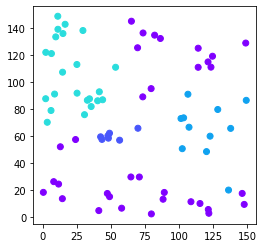

In [6]:
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
plt.show()

PyGame

In [7]:
A1 = np.array([[np.random.uniform(0,20),np.random.uniform(0,20)] for k in range(1,8)])
print(A1)
num = 3
A2 = A1[np.random.choice(A1.shape[0], size=num, replace=False)]+1
print(A2)
A3 = np.zeros((A1.shape[0], num))

def dist(list1,list2):
    return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))

A4 = np.array([[dist(i,j) for i in A2] for j in A1])
print(A4)

np.seterr(divide='ignore')
m = .1
u = (1/A4)**(2/(m-1))
#um = (u / u.sum(axis=1)[:,None])

print(u)
print(u.sum(axis=1)[:,None])
print(u / u.sum(axis=1)[:,None])

[[ 7.95711675 18.45300402]
 [ 2.34812755 15.95520138]
 [17.47020387 13.06516625]
 [ 8.59010164  0.34985931]
 [18.8269353   4.67165953]
 [ 9.92076098 19.75373471]
 [ 3.37849429 13.72522589]]
[[ 8.95711675 19.45300402]
 [19.8269353   5.67165953]
 [ 9.59010164  1.34985931]]
[[ 1.41421356 17.44291717 17.18092543]
 [ 7.47752376 20.27954519 16.30221474]
 [10.64317264  7.76003381 14.11893862]
 [19.10666998 12.4333418   1.41421356]
 [17.77361706  1.41421356  9.81597946]
 [ 1.00947964 17.21734971 18.40684561]
 [ 7.99552818 18.31423334 13.84679616]]
[[  2.16011948 574.31954579 555.3258567 ]
 [ 87.43473612 802.73796286 494.17566419]
 [191.59326432  94.94556781 359.01754024]
 [703.19825306 270.65589761   2.16011948]
 [598.79697455   2.16011948 160.0652214 ]
 [  1.02118799 557.94550055 647.23987569]
 [101.46751364 640.02539619 343.82050609]]
[[1131.80552196]
 [1384.34836317]
 [ 645.55637237]
 [ 976.01427014]
 [ 761.02231543]
 [1206.20656424]
 [1085.31341592]]
[[0.00190856 0.5074366  0.49065484]
 [0

pygame 2.0.0 (SDL 2.0.12, python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


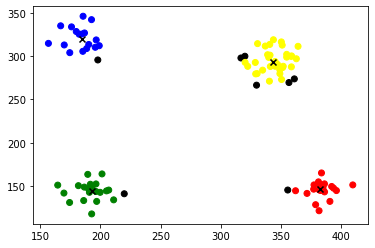

In [8]:
import pygame

data = np.empty((0,2), dtype='f')

def createData(position):
    (x,y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data,[coord],axis=0)
    
radius = 2
color = (0,0,255)
thickness = 0

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption('data generator')

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        createData(pygame.mouse.get_pos())
            
            
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen,color,(int(point[0]),int(point[1])),radius,thickness)
    pygame.display.flip()
    
pygame.quit()


cmeans = C_Means(data, 4, 3, .99)
cmeans.fit()
cmeans.get_labels()


import matplotlib.pyplot as plt
color_list = np.array(['black','red','green','blue','yellow'])
plt.figure()
plt.scatter(data[:,0], data[:,1], c=color_list[cmeans.labels])
plt.scatter(cmeans.centroids[:,0], cmeans.centroids[:,1], c='black', marker='x')
plt.show()